In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
plt.style.use(['science', 'no-latex'])

file_list = os.listdir()
file_list = [_file for _file in file_list if 'FashionMNIST' in _file]

In [2]:
df_columns = ['between-algorithms', 'ascore', 'algorithm-random']

base_file = 'categorical_otdd_naive-curriculum_torchvision.datasets.mnist.FashionMNIST_classes.5.pkl'
base_df = pd.read_pickle(base_file)

base_df.head()

,strategies,ascore,random
0,220.013889,259.555556,256.012222
1,132.888889,146.333333,154.315556
2,44.791667,45.888889,46.600000
3,13.916667,15.111111,14.726667
4,7.805556,7.666667,8.446667


['categorical_otdd_naive-curriculum_torchvision.datasets.mnist.FashionMNIST_lr.0.002_classes.5.pkl', 'categorical_otdd_naive-curriculum_torchvision.datasets.mnist.FashionMNIST_lr.0.0005_classes.5.pkl']


,between-algorithms,algorithm-random
0.5e-3,0.486549,0.513451
1e-3,0.480276,0.519724
2e-3,0.499476,0.500524


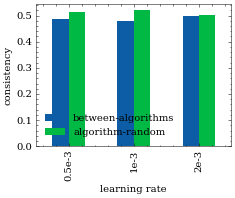

In [3]:
# learning rate ablation
lr_dfs = [base_df]

lr_files = [_file for _file in file_list if '_lr' in _file]
print(lr_files)
for lr_file in lr_files:
    lr_dfs.append(pd.read_pickle(lr_file))

res_df_4 = pd.DataFrame(columns=df_columns)
for idx, lr_df in enumerate(lr_dfs):
    res_df_4.loc[idx] = lr_df.iloc[-1].values
res_df_4.index = ['1e-3', '0.5e-3', '2e-3']
res_df_4.sort_index(inplace=True)
res_df_4.drop(['ascore'], axis=1, inplace=True)
res_df_4 = res_df_4.div(res_df_4.sum(axis=1), axis=0)
lr_df = res_df_4
lr_df.plot.bar()
plt.legend(loc='lower left')
plt.xlabel('learning rate')
plt.ylabel('consistency')
plt.savefig('lr_ablation.png', dpi=200, bbox_inches='tight')
lr_df

['categorical_otdd_naive-curriculum_torchvision.datasets.mnist.FashionMNIST_epochs.10_classes.5.pkl', 'categorical_otdd_naive-curriculum_torchvision.datasets.mnist.FashionMNIST_epochs.20_classes.5.pkl']


,between-algorithms,algorithm-random
1,0.480276,0.519724
10,0.334217,0.665783
20,0.440540,0.559460


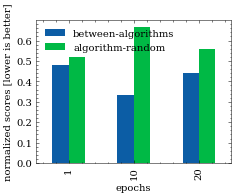

In [4]:
# epoch ablation
epochs_dfs = [base_df]

epochs_files = [_file for _file in file_list if '_epochs' in _file and '.3' not in _file]
print(epochs_files)
for epochs_file in epochs_files:
    epochs_dfs.append(pd.read_pickle(epochs_file))

res_df_4 = pd.DataFrame(columns=df_columns)
for idx, epochs_df in enumerate(epochs_dfs):
    res_df_4.loc[idx] = epochs_df.iloc[-1].values
res_df_4.index = ['1', '20', '10']
res_df_4.sort_index(inplace=True)
res_df_4.drop(['ascore'], axis=1, inplace=True)
res_df_4 = res_df_4.div(res_df_4.sum(axis=1), axis=0)
epoch_df = res_df_4
epoch_df.plot.bar()
plt.legend(loc='upper left')
plt.xlabel('epochs')
plt.ylabel('normalized scores [lower is better]')
plt.savefig('epochs_ablation.png', dpi=200)
epoch_df

['categorical_otdd_naive-curriculum_torchvision.datasets.mnist.FashionMNIST_init.gaussian_classes.5.pkl', 'categorical_otdd_naive-curriculum_torchvision.datasets.mnist.FashionMNIST_init.xavier_classes.5.pkl']


,between-algorithms,algorithm-random
gaussian,0.477592,0.522408
uniform,0.480276,0.519724
xavier,0.497329,0.502671


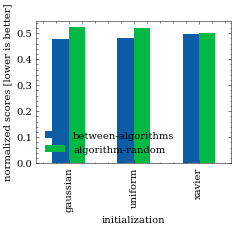

In [5]:
# init ablation
init_dfs = [base_df]

init_files = [_file for _file in file_list if '_init' in _file]
print(init_files)
for init_file in init_files:
    init_dfs.append(pd.read_pickle(init_file))

res_df_4 = pd.DataFrame(columns=df_columns)
for idx, init_df in enumerate(init_dfs):
    res_df_4.loc[idx] = init_df.iloc[-1].values
res_df_4.index = ['uniform', 'gaussian', 'xavier']
res_df_4.sort_index(inplace=True)
res_df_4.drop(['ascore'], axis=1, inplace=True)
res_df_4 = res_df_4.div(res_df_4.sum(axis=1), axis=0)
init_df = res_df_4
init_df.plot.bar()
plt.legend(loc='lower left')
plt.xlabel('initialization')
plt.ylabel('normalized scores [lower is better]')
plt.savefig('init_ablation.png', dpi=100, bbox_inches='tight')
init_df

['categorical_otdd_naive-curriculum_torchvision.datasets.mnist.FashionMNIST_model.ResNet32_CIFAR100_classes.5.pkl']
   between-algorithms     ascore  algorithm-random
0            7.805556   7.666667          8.446667
1           37.166667  37.666667         37.593333


,between-algorithms,algorithm-random
0,0.326334,0.353138
1,0.330586,0.334381


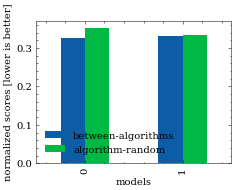

In [7]:
# model ablation
model_dfs = [base_df]

model_files = [_file for _file in file_list if '_model' in _file and 'ResNet32' in _file]
print(model_files)
for model_file in model_files:
    model_dfs.append(pd.read_pickle(model_file))

res_df_4 = pd.DataFrame(columns=df_columns)
for idx, model_df in enumerate(model_dfs):
    res_df_4.loc[idx] = model_df.iloc[-1].values
print(res_df_4)
# res_df_4.index = ['SNet100', 'SNet', 'ResNet']
res_df_4.sort_index(inplace=True)
res_df_4 = res_df_4.div(res_df_4.sum(axis=1), axis=0)
model_df = res_df_4.drop(['ascore'], axis=1)
model_df.plot.bar()
plt.legend(loc='lower left')
plt.xlabel('models')
plt.ylabel('normalized scores [lower is better]')
plt.savefig('model_ablation.png', dpi=100, bbox_inches='tight')
model_df

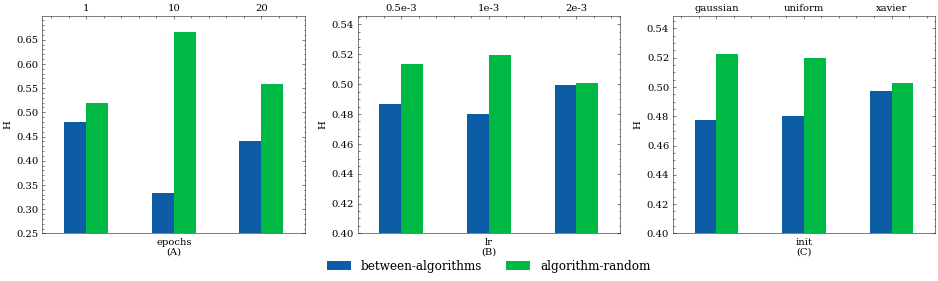

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))
epoch_df.plot.bar(ax=axes[0], legend=False, rot=315)
lr_df.plot.bar(ax=axes[1], legend=False, rot=315)
init_df.plot.bar(ax=axes[2], legend=False, rot=315)

axes[0].set_xlabel('epochs\n(A)')
axes[1].set_xlabel('lr\n(B)')
axes[2].set_xlabel('init\n(C)') 

axes[0].set_ylabel('H')
axes[1].set_ylabel('H')
axes[2].set_ylabel('H')

# axes[0].get_xaxis().set_label_coords(0.5,-0.2)
# axes[1].get_xaxis().set_label_coords(0.5,-0.2)
# axes[2].get_xaxis().set_label_coords(0.5,-0.2)

axes[0].xaxis.tick_top()
axes[1].xaxis.tick_top()
axes[2].xaxis.tick_top()

axes[1].legend(ncol=2, loc='lower center', bbox_to_anchor=(0.5, -0.23), fontsize='large')

axes[0].set_ylim(bottom=0.25)
axes[1].set_ylim(bottom=0.40)
axes[2].set_ylim(bottom=0.40)

fig.savefig('paper.fig.ablation.png', dpi=100, bbox_inches='tight')

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))
lr_df.plot.bar(ax=axes[0], legend=False, rot=315)
init_df.plot.bar(ax=axes[1], legend=False, rot=315)

axes[0].set_xlabel('epochs\n(a)')
axes[1].set_xlabel('lr\n(b)')
axes[2].set_xlabel('init\n(c)') 

axes[0].set_ylabel('H')
axes[1].set_ylabel('H')
axes[2].set_ylabel('H')

# axes[0].get_xaxis().set_label_coords(0.5,-0.2)
# axes[1].get_xaxis().set_label_coords(0.5,-0.2)
# axes[2].get_xaxis().set_label_coords(0.5,-0.2)

axes[0].xaxis.tick_top()
axes[1].xaxis.tick_top()
axes[2].xaxis.tick_top()

axes[1].legend(ncol=2, loc='lower center', bbox_to_anchor=(0.5, -0.23), fontsize='large')

axes[0].set_ylim(bottom=0.25)
axes[1].set_ylim(bottom=0.40)
axes[2].set_ylim(bottom=0.40)

fig.savefig('paper.fig.ablation.png', dpi=100, bbox_inches='tight')